#로지스틱 회귀 실습

##### 1. Plot the training data [2pt]
- plot the training data points $(x, y)$ with their labels $l$ in colors (blue for label 0 and red for label 1)




#### 1. Training Data

- load the training data file ('data-nonlinear.txt')
- each row $\{ (x^{(i)}, y^{(i)}, l^{(i)}) \}$ of the data consists of a 2-dimensional point $(x, y)$ with its label $l$
- $x, y \in \mathbb{R}$ and $l \in \{0, 1\}$



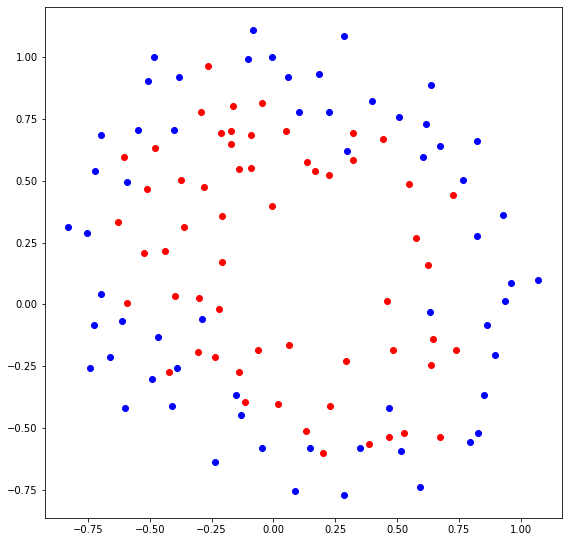

-0.83007 1.0709 -0.76974 1.1089


In [0]:
import numpy as np
import random as rd
import matplotlib.pylab as plt
from matplotlib import cm





data    = np.genfromtxt("/content/drive/My Drive/Colab Notebooks/assignment-02/data-nonlinear.txt", delimiter=',')

x       = data[:, 0]
y       = data[:, 1]
label   = data[:, 2]


x_label0    = x[label == 0]
y_label0    = y[label == 0]

x_label1    = x[label == 1]
y_label1    = y[label == 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, c='b')
plt.scatter(x_label1, y_label1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()



In [0]:

lb_0 = np.column_stack([x_label0, y_label0, np.zeros(len(x_label0))])
lb_1 = np.column_stack([x_label1, y_label1, np.ones(len(x_label1))])


train_set = np.vstack([lb_0,lb_1])

# 관련 함수  


- $\hat{h} = \sigma(z)$ 
- $z = g(x, y; \theta)$, where $g$ is a high dimensional function and $\theta \in \mathbb{R}^{k}$
- $\theta = (\theta_{0}, \theta_{1}, \cdots, \theta_{k-1})$
- $g(x, y ; \theta) = \theta_{0} f_{0}(x, y) + \theta_{1} f_{1}(x, y) + \cdots + \theta_{k-1} f_{k-1}(x, y)$
- $f_{k}(x, y)$ be any high dimensional function of $x$ and $y$
- $\sigma(z) = \frac{1}{1 + \exp(-z)}$
- $\sigma^{\prime}(z) = \sigma(z) (1 - \sigma(z))$
- the dimension $k$ of $\theta$ can be 16, but it can be less than that. you can choose $k$ for the best performance

- $J(\theta) = \frac{1}{m} \sum_{i=1}^m ( - l^{(i)} \log(\sigma(g(x^{(i)}, y^{(i)}; \theta))) - (1 - l^{(i)}) \log(1 - \sigma(g(x^{(i)}, y^{(i)}; \theta)))  )$

---

- $\theta_{k}^{(t+1)} := \theta_0^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (\sigma(g(x^{(i)}, y^{(i)}; \theta)) - l^{(i)}) \frac{\partial g(x^{(i)}, y^{(i)}; \theta^{(t)})}{\partial \theta_{k}}$, for all $k$
- you should choose a learning rate $\alpha$ in such a way that the convergence is achieved
- you can use any initial conditions $\theta_k^{(0)}$ for all $k$

---


위의 플롯을 보니 $\theta_{initial}$은 $[2,1,1]$이 제일 적합할 것 같습니다.

이것을 바탕으로 다음 $\theta$를 정해봅니다.



##### 2. Write down the high dimensional function $g(x, y; \theta)$ [2pt]
- write down the equation for the non-linear function $g(x, y; \theta)$ used for the classifier


In [0]:
def f(data):
    result = []
    functions =[lambda x,y: x, lambda x,y: y, lambda x,y: x + 10]
    for func in functions:
        result.append(list(map(func, data[0,:], data[1,:])))
    return np.array(result)



In [0]:
alpha = 0.0006
m = len(train_set)

def z(th, x):
    return np.matmul(th,f(x))
def h(th, x):
    return 1 / (1 +np.exp(-z(th, x)))
def J(th, data): 
    return (1/(m)) * np.sum(                                                   \
        - data[:,3] * np.log(h(th,np.transpose(data[:,0:2])))                  \
        - (1-data[:,3]) * np.log(1 - h(th,np.transpose(data[:,0:2])))          \
        )
def accuracy():
    return np.sum((np.equal(data[:,2], 
    np.around(h(g_th,f(np.transpose(train_set[:,0:2]))))))) / data[:,2].shape[0]
    

# np.sum((h(th, np.transpose(data[:,0:4]))- data[:,4]) ** 2)
def th_cal(th):
    result = []
    diff = (h(th, np.transpose(train_set[:,0:2])) - train_set[:,2])
    for j in range(len(th)):
        result.append( th[j]-(alpha * (1/m) * np.sum(  diff * train_set[:,j] )) )
    return np.array(result)


In [0]:
g_th = np.array([2,1,1])
J_log_train = [J(g_th, train_set)]
th_log = [g_th]
accuracy_log = [accuracy()]

# import sys
e = 5*10 ** (-14)

from tqdm.notebook import tqdm
for i in tqdm(range(600000)):
    g_th = th_cal(g_th)
    J_log_train.append(J(g_th, train_set))
    th_log.append(g_th)
    accuracy_log.append(accuracy())
    if(i==100000):
        alpha = 0.0003
    elif(i == 500000):
        alpha = 0.00001
    elif(i == 1000000):
        alpha = 0.000003
    elif(i == 1500000):
        alpha = 0.000001
    if abs(J(g_th, train_set) - J_log_train[-2]) <=e and np.sum (g_th -th_log[-2]) <= 4*e:
        break


In [0]:
print(J_log_train[-2])

0.20488048335469775




---




##### 3. Plot the training error [3pt]
- plot the training error $J(\theta_0, \theta_1, \theta_2)$ at every iteration of gradient descent until convergence (in blue color)



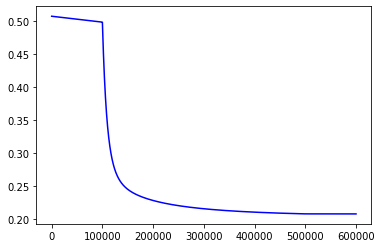

In [0]:
plt.plot(J_log_train,c='blue')
plt.show()

##### 4. Plot the training accuracy [3pt]
- plot the training accuracy at every iteration of gradient descent until convergence (in red color)



In [0]:
plt.plot(J_log_train,c='red')
plt.show()

##### 5. Write down the final training accuracy [2pt]
- the final training accuracy at convergence


In [0]:
accuracy()

0.4915254237288136


##### 6. Plot the optimal classifier superimposed on the training data [5pt]
- plot the boundary of the optimal classifier at convergence (in green color)
- the boundary of the classifier is defined by $\{ (x, y) \mid \sigma(g(x, y ; \theta)) = 0.5 \} = \{ (x, y) \mid g(x, y ; \theta) = 0 \}$
- plot the training data points $(x, y)$ with their labels $l$ in colors superimposed on the illustration of the classifier (blue for label 0 and red for label 1)
- you can use `contour` function in python3


[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: No contour levels were found within the data range.
  if __name__ == '__main__':


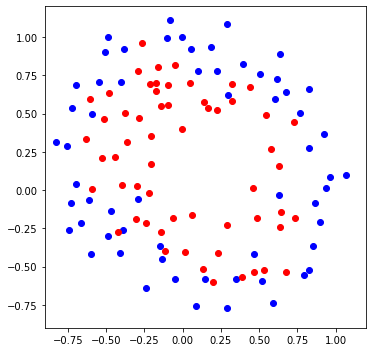

In [159]:
X, Y = np.meshgrid(np.linspace(-0.9, 1.2, 1000), np.linspace(-0.9, 1.2, 1000))


Z = np.array([  np.around(   h(g_th, np.array([x,y]) )   ) for x,y in zip(X,Y)  ])
print(Z)

plt.figure(figsize=(12, 5))
# levels에 구간을 넣어줘서 등고선 표시 위치를 정할 수 있습니다
plt.contour(X, Y, Z, cmap='Greens',levels = np.linspace(Z.reshape(-1, 1).min(), Z.reshape(-1, 1).max(), 50))

plt.scatter(x_label0, y_label0, c='b')
plt.scatter(x_label1, y_label1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')


plt.show()

